# Resumen de métricas de PyOD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
clasificadores = pd.read_csv('Resultados/KNN_completo.csv')
clasificadores = clasificadores.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
knn = pd.read_csv('Resultados/KNN_completo.csv',usecols=['Y_pred'])
nn = pd.read_csv('Resultados/NN_completo.csv',usecols=['Y_pred'])
logicreg = pd.read_csv('Resultados/LogicReg_completo.csv',usecols=['Y_pred'])
svm = pd.read_csv('Resultados/SVM_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
clasificadores['KNN'] = knn['Y_pred']
clasificadores['NN'] = nn['Y_pred']
clasificadores['LogicReg'] = logicreg['Y_pred']
clasificadores['SVM'] = svm['Y_pred']

In [5]:
clasificadores = clasificadores.set_index('fecha')

In [6]:
clasificadores.head()

,Negro,Congelado,Hum,Anomalia,KNN,NN,LogicReg,SVM
fecha,,,,,,,,
2021-09-25 06:51:00,0,0,0,0,0,0,0,1
2021-06-20 02:11:00,0,0,0,0,0,0,0,1
2021-04-17 02:33:00,0,0,0,0,0,0,0,0
2021-06-25 20:59:00,0,0,0,0,0,0,0,1
2021-03-17 22:22:00,0,0,0,0,0,0,0,0


## Métricas generales:

In [7]:
anomalias = ['Anomalia','Negro','Congelado','Hum']
metodos = ['KNN','NN','LogicReg', 'SVM']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(clasificadores['Anomalia'], clasificadores[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(clasificadores['Anomalia'], clasificadores[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
KNN,0.977482,0.995917,0.991279,0.970939,0.955669,0.999294
NN,0.996336,0.999053,0.994641,0.993368,0.993121,0.999551
LogicReg,0.909322,0.983845,0.96497,0.878627,0.821146,0.997498
SVM,0.243928,0.42446,0.004668,-0.145637,0.030318,0.457537


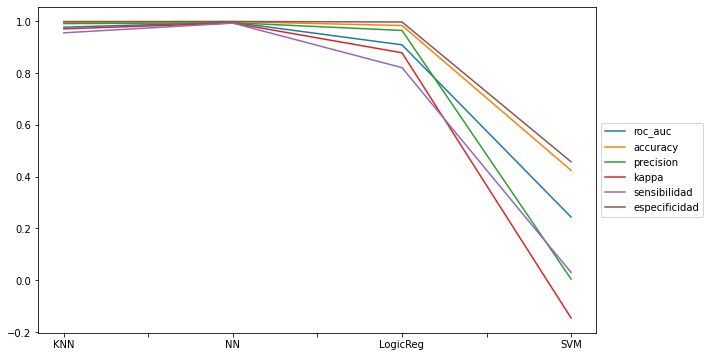

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

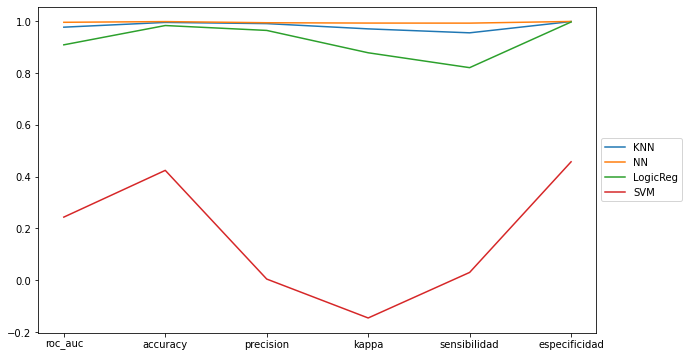

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## Métricas para la anomalía Hum

In [10]:
metricas_hum = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_hum.loc[metodo,metricas[0]] = roc_auc_score(clasificadores['Hum'], clasificadores[metodo])
    metricas_hum.loc[metodo,metricas[1]] = accuracy_score(clasificadores['Hum'], clasificadores[metodo])
    metricas_hum.loc[metodo,metricas[2]] = precision_score(clasificadores['Hum'], clasificadores[metodo])
    metricas_hum.loc[metodo,metricas[3]] = cohen_kappa_score(clasificadores['Hum'], clasificadores[metodo])
    metricas_hum.loc[metodo,metricas[4]] = recall_score(clasificadores['Hum'], clasificadores[metodo])
    metricas_hum.loc[metodo,metricas[5]] = recall_score(clasificadores['Hum'], clasificadores[metodo], pos_label=0)
metricas_hum

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
KNN,0.462472,0.919854,0.0,-0.010357,0.0,0.924944
NN,0.461133,0.917191,0.0,-0.010382,0.0,0.922267
LogicReg,0.625454,0.932084,0.026347,0.038869,0.315412,0.935497
SVM,0.247203,0.491686,0.0,-0.011008,0.0,0.494407


## Sensibilidad por tipo de anomalía

In [10]:
sensibilidades = pd.DataFrame(index=metodos, columns=anomalias)

for metodo in metodos:
    for anomalia in anomalias:
        sensibilidades.loc[metodo,anomalia] = recall_score(clasificadores[anomalia], clasificadores[metodo])

sensibilidades

,Anomalia,Negro,Congelado,Hum
KNN,0.955669,0.996197,0.947044,0.0
NN,0.993121,0.998098,0.993177,0.0
LogicReg,0.821146,0.851347,0.917804,0.315412
SVM,0.030318,0.010777,0.027615,0.0


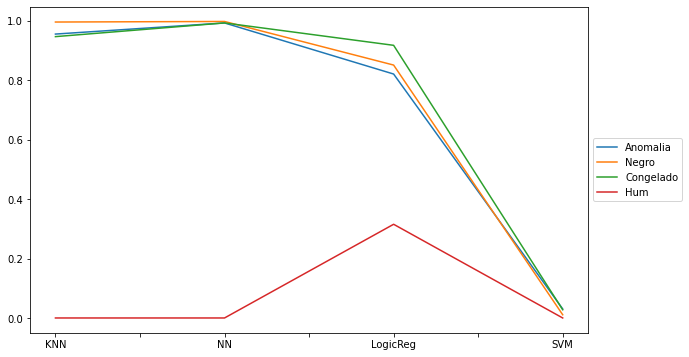

In [11]:
sensibilidades.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

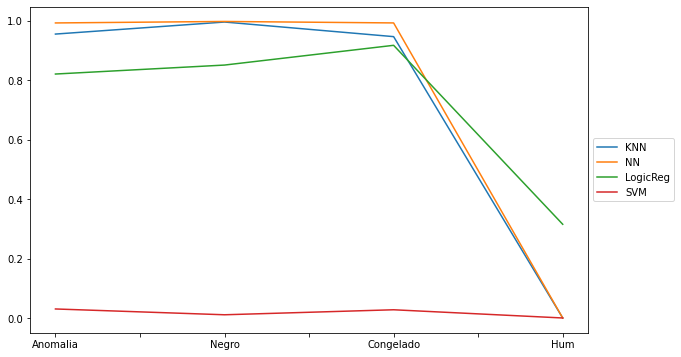

In [12]:
sensibilidades.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))